In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv("D:/Aedifico/Machine Learning/Datasets/BlackFriday.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
# Replace missing values with mean
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(data.iloc[:, 9:11].values)
data.iloc[:,9:11] = imputer.transform(data.iloc[:, 9:11].values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
#Dropping User ID and Product ID
data.drop(['User_ID','Product_ID'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      537577 non-null  object 
 1   Age                         537577 non-null  object 
 2   Occupation                  537577 non-null  int64  
 3   City_Category               537577 non-null  object 
 4   Stay_In_Current_City_Years  537577 non-null  object 
 5   Marital_Status              537577 non-null  int64  
 6   Product_Category_1          537577 non-null  int64  
 7   Product_Category_2          537577 non-null  float64
 8   Product_Category_3          537577 non-null  float64
 9   Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 41.0+ MB


In [7]:
# Specifying Occupation as string instead of integer
data['Occupation']=data['Occupation'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      537577 non-null  object 
 1   Age                         537577 non-null  object 
 2   Occupation                  537577 non-null  object 
 3   City_Category               537577 non-null  object 
 4   Stay_In_Current_City_Years  537577 non-null  object 
 5   Marital_Status              537577 non-null  int64  
 6   Product_Category_1          537577 non-null  int64  
 7   Product_Category_2          537577 non-null  float64
 8   Product_Category_3          537577 non-null  float64
 9   Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 41.0+ MB


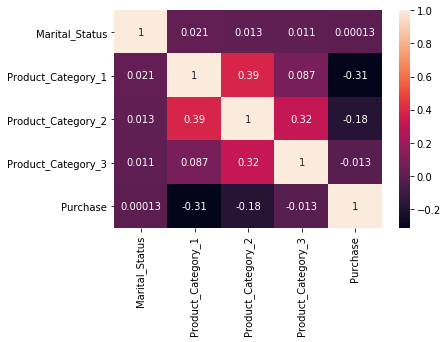

In [8]:
# Chceking for multi-collinearity in numeric variables
sns.heatmap(
    data.corr(),
    annot=True
)

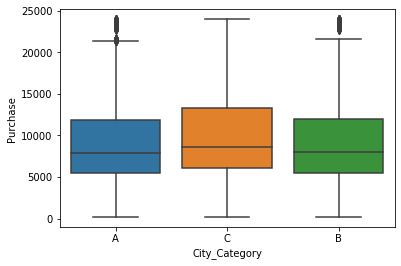

In [9]:
# No significant effect of city category
sns.boxplot(x='City_Category',y='Purchase',data=data)

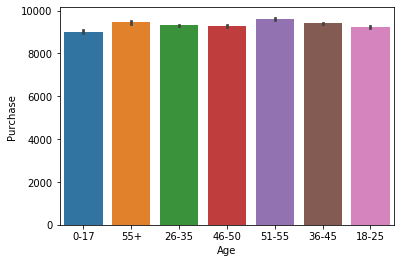

In [10]:
# Different age groups have spent different amounts
sns.barplot(x='Age',y='Purchase',data=data)

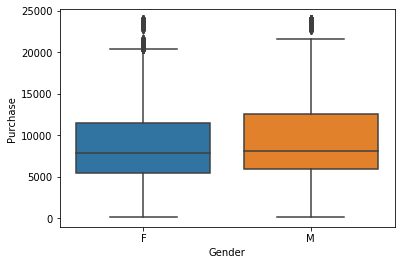

In [11]:
# Different effect of males and females
sns.boxplot(x='Gender',y='Purchase',data=data)

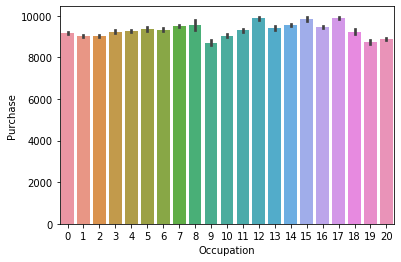

In [12]:
#Different effect
sns.barplot(x='Occupation',y='Purchase',data=data)

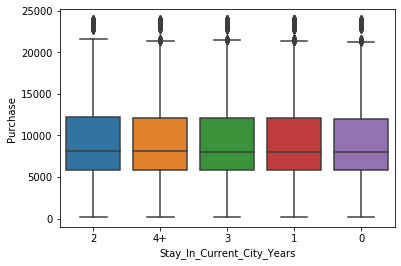

In [13]:
#Same effect, remove Stay in city
sns.boxplot(x='Stay_In_Current_City_Years',y='Purchase',data=data)

In [14]:
data.drop(['Stay_In_Current_City_Years'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Gender              537577 non-null  object 
 1   Age                 537577 non-null  object 
 2   Occupation          537577 non-null  object 
 3   City_Category       537577 non-null  object 
 4   Marital_Status      537577 non-null  int64  
 5   Product_Category_1  537577 non-null  int64  
 6   Product_Category_2  537577 non-null  float64
 7   Product_Category_3  537577 non-null  float64
 8   Purchase            537577 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 36.9+ MB


In [15]:
# Seperating categorical and numeric variables
categorical = [col for col in data.columns if data[col].dtype=='object']
numerical = [col for col in data.columns if data[col].dtype!='object']
cat = data[categorical]
num = data[numerical]

In [16]:
# Converting categorical data to dummies
dummies  = pd.get_dummies(cat,drop_first=True)
dummies

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,Occupation_2,Occupation_3,...,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_B,City_Category_C
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
537573,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
537574,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
537575,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [28]:
# Combine all independent variables - dummies and numeric
X = pd.concat([dummies.reset_index(drop=True),num.reset_index(drop=True)],axis=1)
X.drop(['Purchase'],axis=1,inplace=True)
X

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,Occupation_2,Occupation_3,...,Occupation_17,Occupation_18,Occupation_19,Occupation_20,City_Category_B,City_Category_C,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9.842144,12.66984
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6.000000,14.00000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,9.842144,12.66984
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,14.000000,12.66984
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,8,9.842144,12.66984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,2.000000,12.66984
537573,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,15.000000,16.00000
537574,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,8,15.000000,12.66984
537575,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,5,9.842144,12.66984


In [29]:
# Seperating dependent variable
y = data['Purchase']
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
537572    11664
537573    19196
537574     8043
537575     7172
537576     6875
Name: Purchase, Length: 537577, dtype: int64

In [30]:
# Determining p-values based on regression model
X2 = sm.add_constant(X) 
results = sm.OLS(y,X2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     2069.
Date:                Thu, 04 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:45:49   Log-Likelihood:            -5.3072e+06
No. Observations:              537577   AIC:                         1.061e+07
Df Residuals:                  537543   BIC:                         1.061e+07
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.026e+04     74

In [31]:
#p-value is probability that this variable has no effect on y
results.pvalues[results.pvalues < 0.05].index

Index(['const', 'Gender_M', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'Occupation_1', 'Occupation_3', 'Occupation_4',
       'Occupation_6', 'Occupation_7', 'Occupation_9', 'Occupation_10',
       'Occupation_12', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_19', 'Occupation_20', 'City_Category_B',
       'City_Category_C', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [20]:
# Choosing only variables with p-value < 0.05 (significant)
X = X[['Gender_M', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'Occupation_1', 'Occupation_3', 'Occupation_4',
       'Occupation_6', 'Occupation_7', 'Occupation_9', 'Occupation_10',
       'Occupation_12', 'Occupation_14', 'Occupation_15', 'Occupation_16',
       'Occupation_17', 'Occupation_19', 'Occupation_20', 'City_Category_B',
       'City_Category_C', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]

In [21]:
# Train-test split
train_X, test_X, train_y, test_y = train_test_split(X,y,
                                                    train_size=0.8,
                                                    test_size=0.2,random_state=0)

In [22]:
# Fitting decision tree regressor
regressor = DecisionTreeRegressor(random_state=1,max_depth=10,
                      max_features=5, max_leaf_nodes=5,
                      min_samples_leaf=5, splitter='best')
regressor.fit(train_X,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=5, max_leaf_nodes=5,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [23]:
pred=regressor.predict(test_X)

In [24]:
from sklearn.metrics import mean_squared_error
rmse = (mean_squared_error(test_y,pred))**0.5
rmse

4204.625590098304